<a href="https://colab.research.google.com/github/alinorouziani/BinaryClassificationPytoch/blob/main/BinaryClassificationPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

###Make the data:

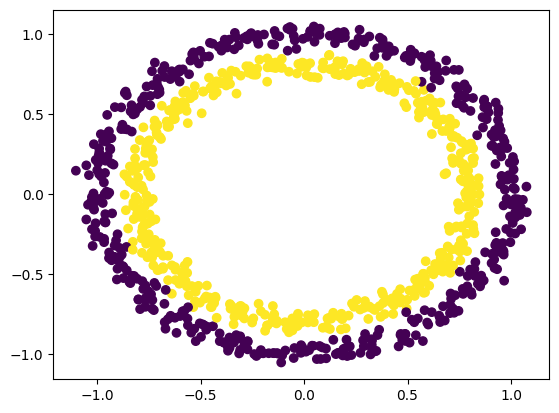

In [5]:
x, y = make_circles(n_samples = 1000,
                    noise = 0.04,
                    random_state = 123)

plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')

### Turn data into tensors and make train and test splits:

In [6]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

###Build a model:

In [10]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=198),
        nn.ReLU(),
        nn.Linear(in_features=198, out_features=50),
        nn.ReLU(),
        nn.Linear(in_features=50, out_features=1),
    )
  def forward(self, x):
    return self.layers(x)

In [11]:
model = CircleModel()

In [38]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    model.eval()
    with torch.no_grad():
        y_logits = model(X_grid)
        y_pred = torch.round(torch.sigmoid(y_logits))
    y_pred = y_pred.reshape(xx.shape).numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


###Setup loss function and optimize:

In [12]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

###Build a train model:

In [15]:
epoches = 1000
for epoch in range(epoches):
  model.train()
  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_function(y_logits, y_train)
  acc = accuracy(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_function(test_logits, y_test)
    test_acc = accuracy(y_test, test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69192 | Acc: 51.12% | Test Loss: 0.69484 | Test Acc: 45.50%
Epoch: 100 | Loss: 0.68267 | Acc: 84.62% | Test Loss: 0.68338 | Test Acc: 82.00%
Epoch: 200 | Loss: 0.66039 | Acc: 87.88% | Test Loss: 0.66247 | Test Acc: 88.00%
Epoch: 300 | Loss: 0.57354 | Acc: 95.50% | Test Loss: 0.58024 | Test Acc: 98.00%
Epoch: 400 | Loss: 0.44960 | Acc: 76.00% | Test Loss: 0.44087 | Test Acc: 71.50%
Epoch: 500 | Loss: 0.36212 | Acc: 80.62% | Test Loss: 0.36193 | Test Acc: 79.00%
Epoch: 600 | Loss: 0.12472 | Acc: 99.62% | Test Loss: 0.12388 | Test Acc: 99.00%
Epoch: 700 | Loss: 0.05534 | Acc: 99.88% | Test Loss: 0.05500 | Test Acc: 99.00%
Epoch: 800 | Loss: 0.03590 | Acc: 100.00% | Test Loss: 0.03724 | Test Acc: 99.50%
Epoch: 900 | Loss: 0.02693 | Acc: 100.00% | Test Loss: 0.02976 | Test Acc: 99.50%


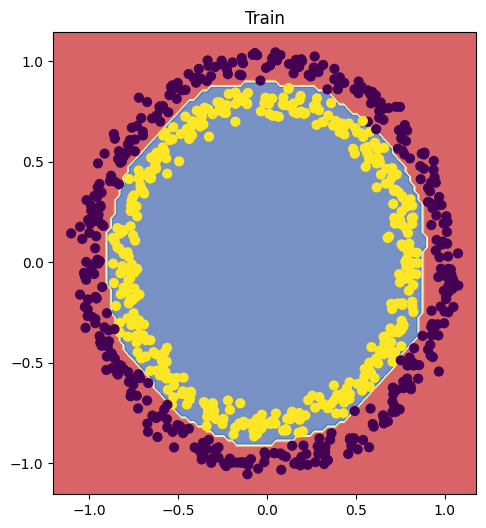

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)

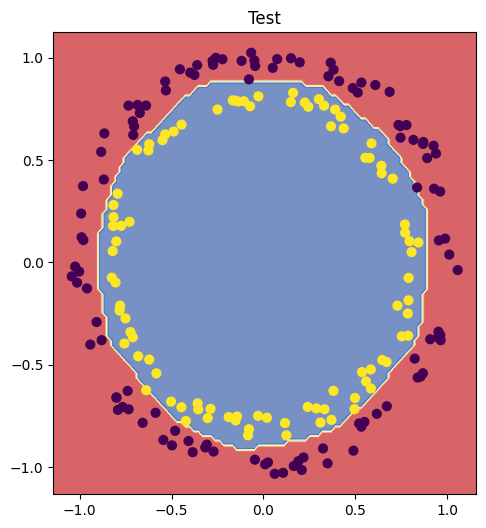

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)